# Explore here

In [1]:
# Your code here

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.datasets import mnist

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


import warnings

2025-01-07 22:01:37.121613: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-07 22:01:37.141440: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-07 22:01:37.389305: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-07 22:01:37.555300: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736287297.858359   14591 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736287297.92

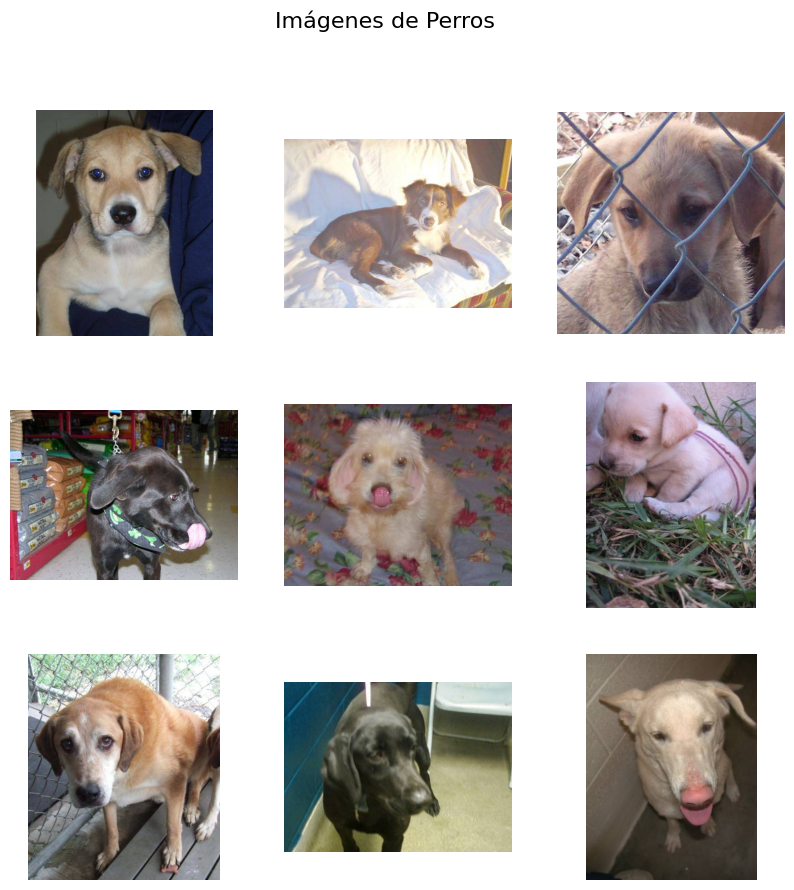

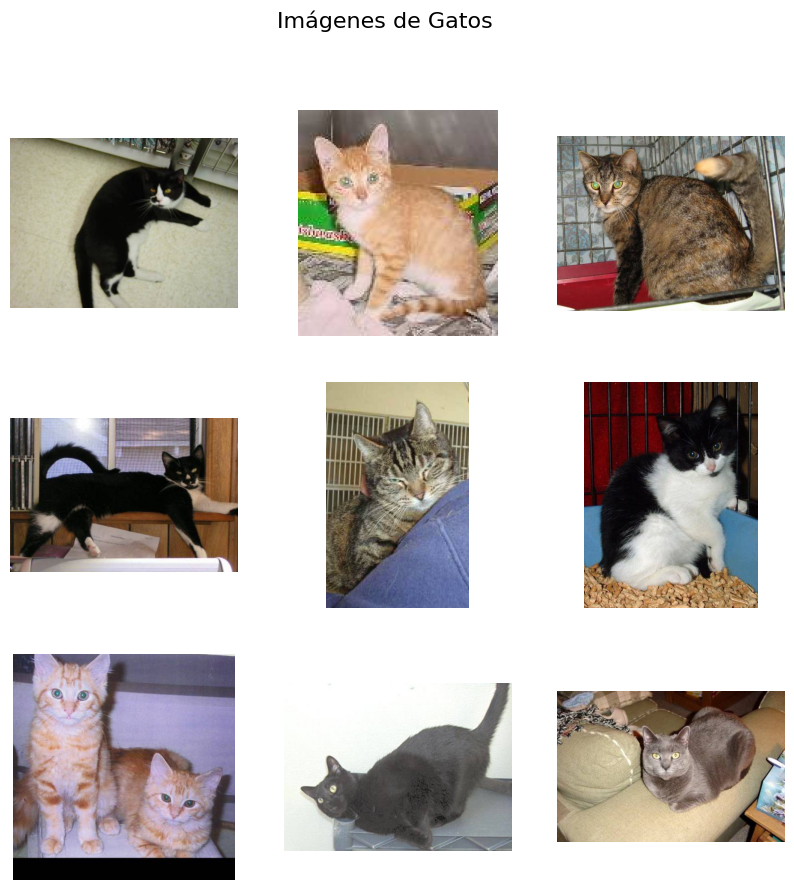

In [4]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Rutas de las carpetas de entrenamiento y prueba
train_dir = "/workspaces/Proyecto-Tutorial-de-Clasficador-de-Imagenes-VLG/data/train"
test_dir = "/workspaces/Proyecto-Tutorial-de-Clasficador-de-Imagenes-VLG/data/test1"

# Función para cargar imágenes de una carpeta
def load_images_from_folder(folder, label, max_images=9):
    images = []
    count = 0
    for filename in os.listdir(folder):
        if label in filename:  # Filtra por perros o gatos
            img_path = os.path.join(folder, filename)
            img = Image.open(img_path)
            images.append(img)
            count += 1
            if count >= max_images:
                break
    return images

# Cargar imágenes de perros y gatos
dog_images = load_images_from_folder(train_dir, "dog")
cat_images = load_images_from_folder(train_dir, "cat")

# Función para mostrar 9 imágenes
def plot_images(images, title):
    plt.figure(figsize=(10, 10))
    for i, img in enumerate(images):
        plt.subplot(3, 3, i + 1)
        plt.imshow(img)
        plt.axis("off")
    plt.suptitle(title, fontsize=16)
    plt.show()

# Mostrar 9 imágenes de perros y gatos
plot_images(dog_images, "Imágenes de Perros")
plot_images(cat_images, "Imágenes de Gatos")

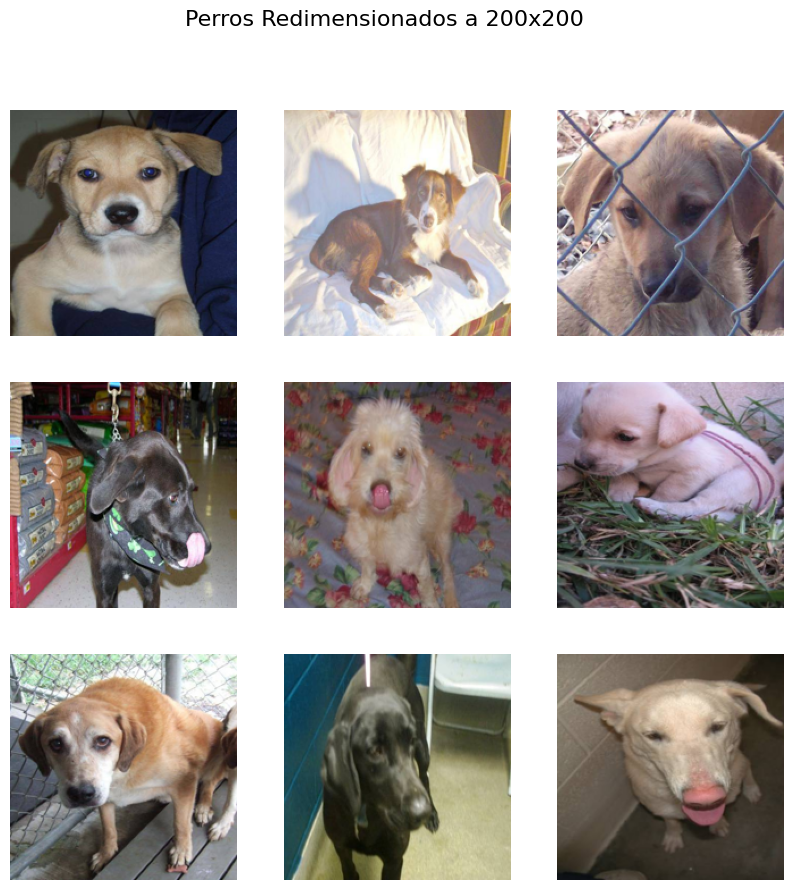

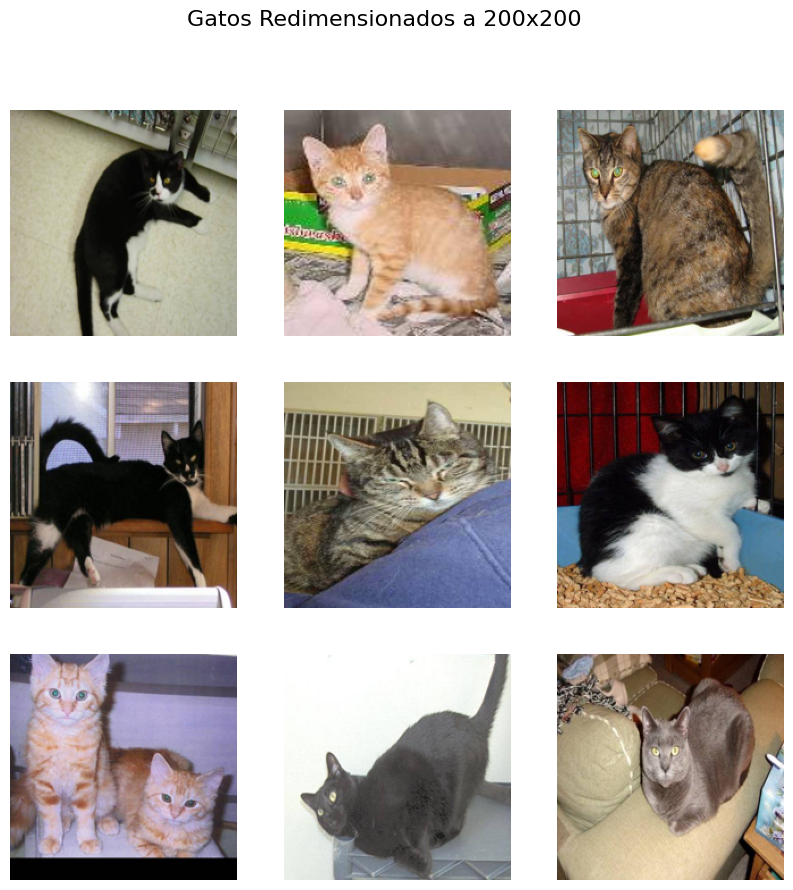

In [5]:
# Función para redimensionar imágenes a 200x200 píxeles
def resize_images(images, size=(200, 200)):
    resized_images = [img.resize(size) for img in images]
    return resized_images

# Redimensionar imágenes de perros y gatos
dog_images_resized = resize_images(dog_images)
cat_images_resized = resize_images(cat_images)

# Mostrar imágenes redimensionadas
plot_images(dog_images_resized, "Perros Redimensionados a 200x200")
plot_images(cat_images_resized, "Gatos Redimensionados a 200x200")

In [6]:
import os
import psutil

# Obtener información de memoria
mem = psutil.virtual_memory()

print(f"Memoria Total: {round(mem.total / 1e9, 2)} GB")
print(f"Memoria Disponible: {round(mem.available / 1e9, 2)} GB")

Memoria Total: 8.31 GB
Memoria Disponible: 3.36 GB


In [9]:
import shutil

# Rutas de las carpetas
train_dir = "/workspaces/Proyecto-Tutorial-de-Clasficador-de-Imagenes-VLG/data/train"
test_dir = "/workspaces/Proyecto-Tutorial-de-Clasficador-de-Imagenes-VLG/data/test1"

# Crear subcarpetas dentro de train
cats_dir = os.path.join(train_dir, "cats")
dogs_dir = os.path.join(train_dir, "dogs")
os.makedirs(cats_dir, exist_ok=True)
os.makedirs(dogs_dir, exist_ok=True)

# Reorganizar imágenes en la carpeta train
for filename in os.listdir(train_dir):
    filepath = os.path.join(train_dir, filename)
    if os.path.isfile(filepath):  # Ignorar directorios
        if filename.startswith("cat"):
            shutil.move(filepath, os.path.join(cats_dir, filename))
        elif filename.startswith("dog"):
            shutil.move(filepath, os.path.join(dogs_dir, filename))

print("Reorganización de train completada.")

Reorganización de train completada.


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Crear generadores de datos
train_datagen = ImageDataGenerator(rescale=1.0 / 255)  # Normalizar imágenes (valores entre 0 y 1)


# Generador para el conjunto de entrenamiento
train_generator = train_datagen.flow_from_directory(
    train_dir,                     # Ruta de las imágenes de entrenamiento
    target_size=(200, 200),        # Redimensionar todas las imágenes a 200x200
    batch_size=32,                 # Tamaño de batch
    class_mode="binary"            # Clasificación binaria (perros y gatos)
)


# Verificar clases y muestras cargadas
print("Clases encontradas (entrenamiento):", train_generator.class_indices)
print("Total de imágenes de entrenamiento:", train_generator.samples)


Found 25000 images belonging to 2 classes.
Found 0 images belonging to 0 classes.
Clases encontradas (entrenamiento): {'cats': 0, 'dogs': 1}
Total de imágenes de entrenamiento: 25000
Total de imágenes de prueba: 0


In [11]:
# Crear DataFrame con los nombres de las imágenes
test_image_paths = [os.path.join(test_dir, fname) for fname in os.listdir(test_dir) if fname.endswith(".jpg")]

# Crear un DataFrame para flow_from_dataframe
test_df = pd.DataFrame({"filename": [os.path.basename(path) for path in test_image_paths]})

print("Primeras filas del DataFrame de prueba:")
print(test_df.head())

Primeras filas del DataFrame de prueba:
    filename
0   1260.jpg
1  10577.jpg
2    728.jpg
3   5931.jpg
4   3150.jpg


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Crear el generador de datos
test_datagen = ImageDataGenerator(rescale=1.0 / 255)  # Normalizar imágenes

# Usar flow_from_dataframe para cargar imágenes desde test1
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=test_dir,              # Carpeta de imágenes
    x_col="filename",                # Columna con los nombres de archivo
    y_col=None,                      # No hay etiquetas
    target_size=(200, 200),          # Redimensionar a 200x200
    batch_size=32,                   # Tamaño de batch
    class_mode=None,                 # Sin etiquetas
    shuffle=False                    # No mezclar, para mantener el orden
)

print("Total de imágenes de prueba:", test_generator.samples)

Found 12500 validated image filenames.
Total de imágenes de prueba: 12500
